In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/student-sleep-patterns/student_sleep_patterns.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, normalize

from sklearn.decomposition import PCA

from sklearn.cluster import KMeans

from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

In [3]:
df = pd.read_csv(r'/kaggle/input/student-sleep-patterns/student_sleep_patterns.csv')
df

,Student_ID,Age,Gender,University_Year,Sleep_Duration,Study_Hours,Screen_Time,Caffeine_Intake,Physical_Activity,Sleep_Quality,Weekday_Sleep_Start,Weekend_Sleep_Start,Weekday_Sleep_End,Weekend_Sleep_End
0,1,24,Other,2nd Year,7.7,7.9,3.4,2,37,10,14.16,4.05,7.41,7.06
1,2,21,Male,1st Year,6.3,6.0,1.9,5,74,2,8.73,7.10,8.21,10.21
2,3,22,Male,4th Year,5.1,6.7,3.9,5,53,5,20.00,20.47,6.88,10.92
3,4,24,Other,4th Year,6.3,8.6,2.8,4,55,9,19.82,4.08,6.69,9.42
4,5,20,Male,4th Year,4.7,2.7,2.7,0,85,3,20.98,6.12,8.98,9.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,24,Male,2nd Year,5.1,9.3,1.9,4,110,4,17.42,8.43,6.93,10.78
496,497,20,Male,2nd Year,8.9,7.7,3.5,3,40,4,1.22,15.54,5.85,7.23
497,498,21,Male,3rd Year,5.7,6.4,3.9,1,68,10,9.94,2.25,5.46,10.72
498,499,18,Female,2nd Year,4.9,0.5,3.5,0,12,2,19.10,15.49,8.35,7.20


In [4]:
df = df.drop(['Student_ID', 'Weekday_Sleep_Start', 'Weekend_Sleep_Start', 'Weekday_Sleep_End', 'Weekend_Sleep_End'],
             axis=1)

In [5]:
#Remove suffixes
df['University_Year'] = df['University_Year'].str.replace('st Year', '')
df['University_Year'] = df['University_Year'].str.replace('nd Year', '')
df['University_Year'] = df['University_Year'].str.replace('rd Year', '')
df['University_Year'] = df['University_Year'].str.replace('th Year', '')

df['University_Year'] = df['University_Year'].astype(int)

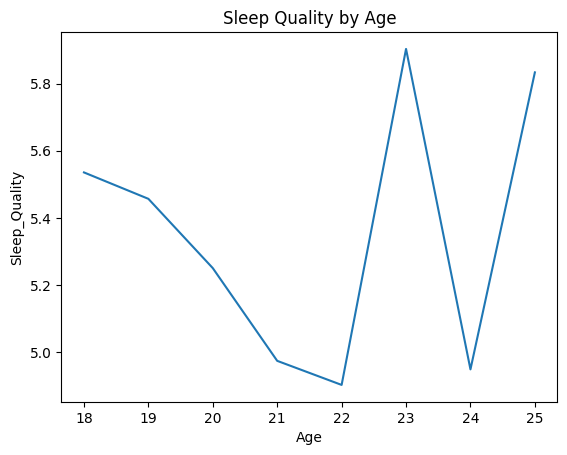

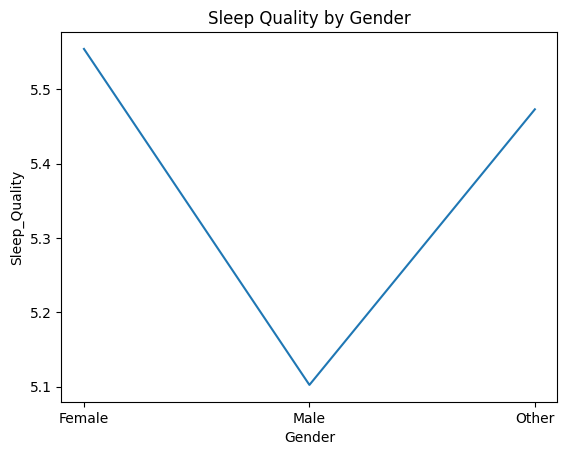

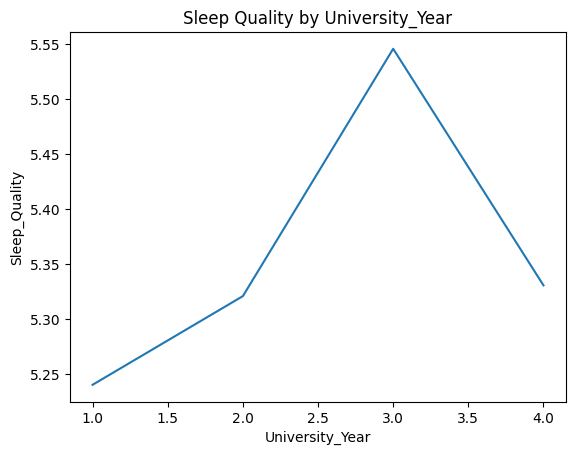

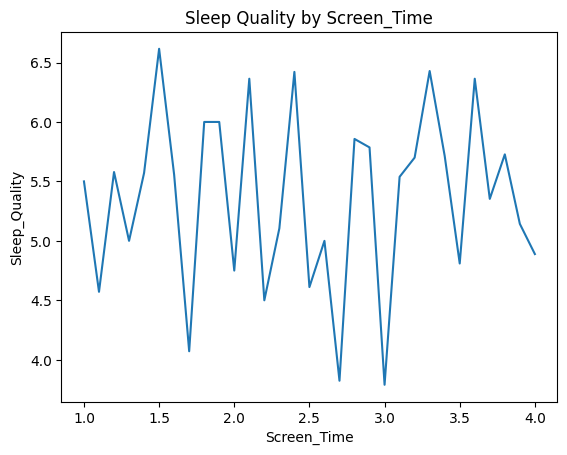

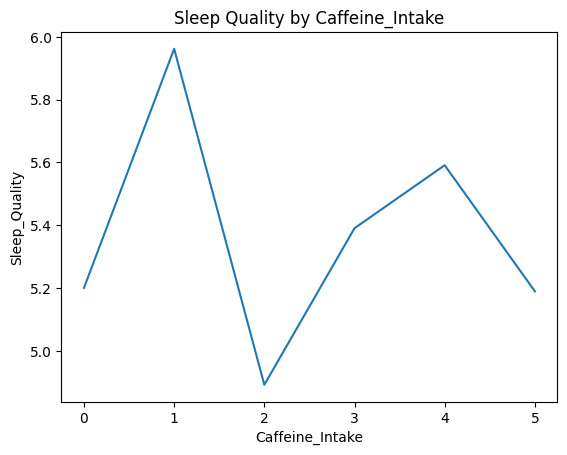

In [6]:
columns = ['Age', 'Gender', 'University_Year', 'Screen_Time', 'Caffeine_Intake',]

for col in columns:
    x = df.groupby([col])['Sleep_Quality'].mean().reset_index()
    sns.lineplot(x=col, y='Sleep_Quality', data=x)
    plt.title(f'Sleep Quality by {col}')
    plt.show()

**If you are 22, if you are male, if you are in the first grade you are not going to sleep well! :D**


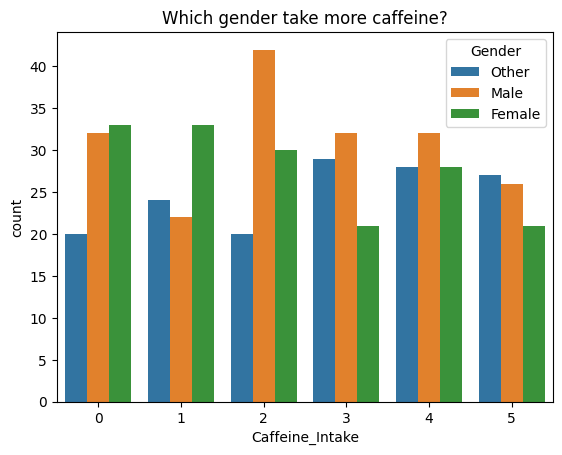

In [7]:
sns.countplot(data=df, x='Caffeine_Intake', hue='Gender')
plt.title('Which gender take more caffeine?');

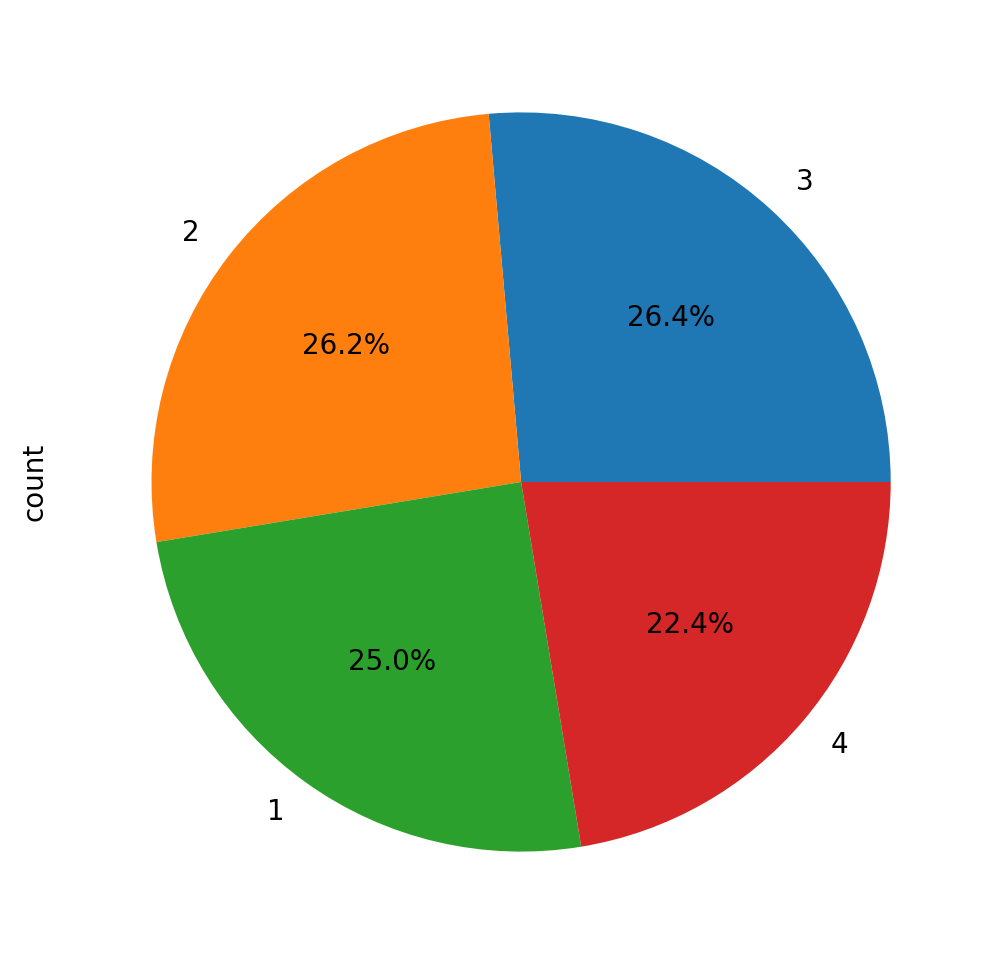

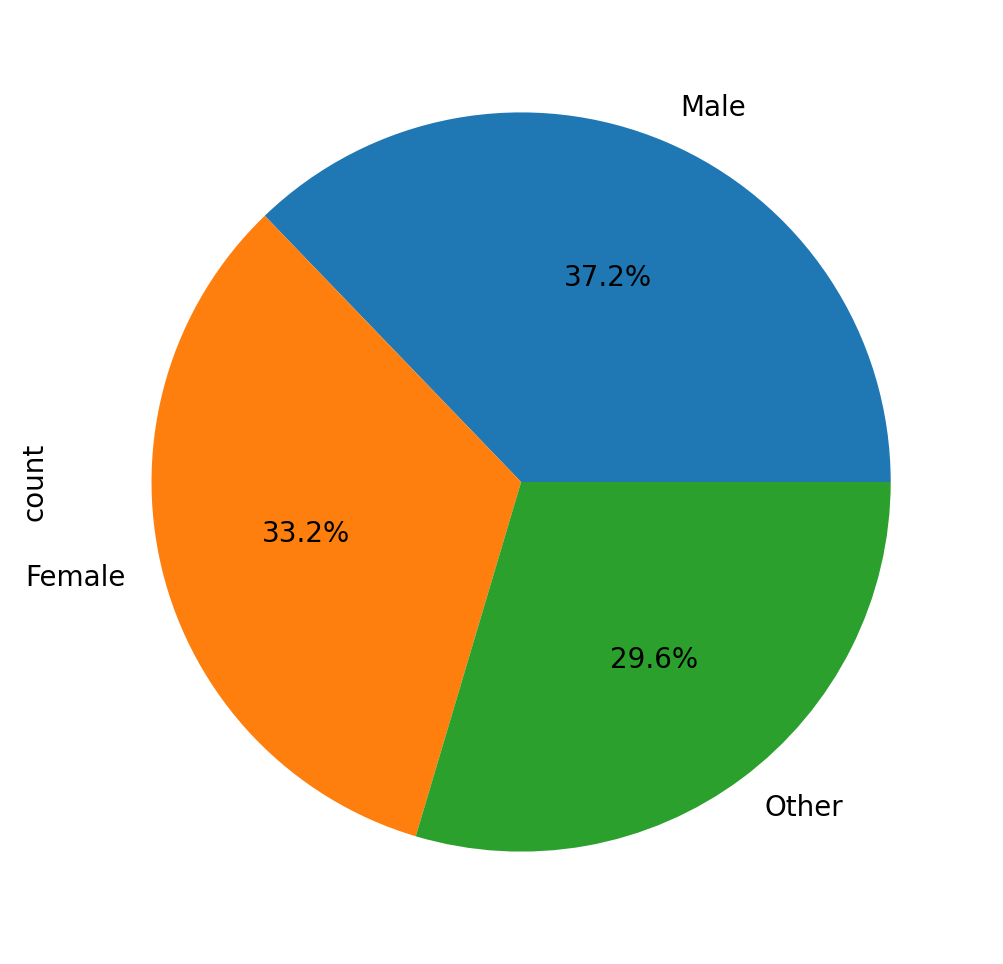

In [8]:
plt.figure(figsize=(4, 3), dpi=200)
df['University_Year'].value_counts().plot(kind='pie', stacked=True,  figsize=(9,6), autopct='%1.1f%%')
plt.show()


plt.figure(figsize=(4, 3), dpi=200)
df['Gender'].value_counts().plot(kind='pie', stacked=True,  figsize=(9,6), autopct='%1.1f%%')
plt.show()

# PREPROCESSING

In [9]:
X = pd.get_dummies(df)

In [10]:
scaler = StandardScaler()

scaled_X = scaler.fit_transform(X)

In [11]:
normalized_X = normalize(scaled_X) 

normalized_X = pd.DataFrame(normalized_X) 

In [12]:
pca = PCA(n_components = 2) 

X_pca = pca.fit_transform(normalized_X) 
X_pca = pd.DataFrame(X_pca) 

X_pca.columns = ['P1', 'P2'] 


X_pca

,P1,P2
0,-0.223946,0.579331
1,0.623364,-0.055017
2,0.511652,-0.149136
3,-0.157796,0.686964
4,0.473896,-0.334482
...,...,...
495,0.624009,0.077817
496,0.480913,-0.244781
497,0.430725,-0.269312
498,-0.347041,-0.516294


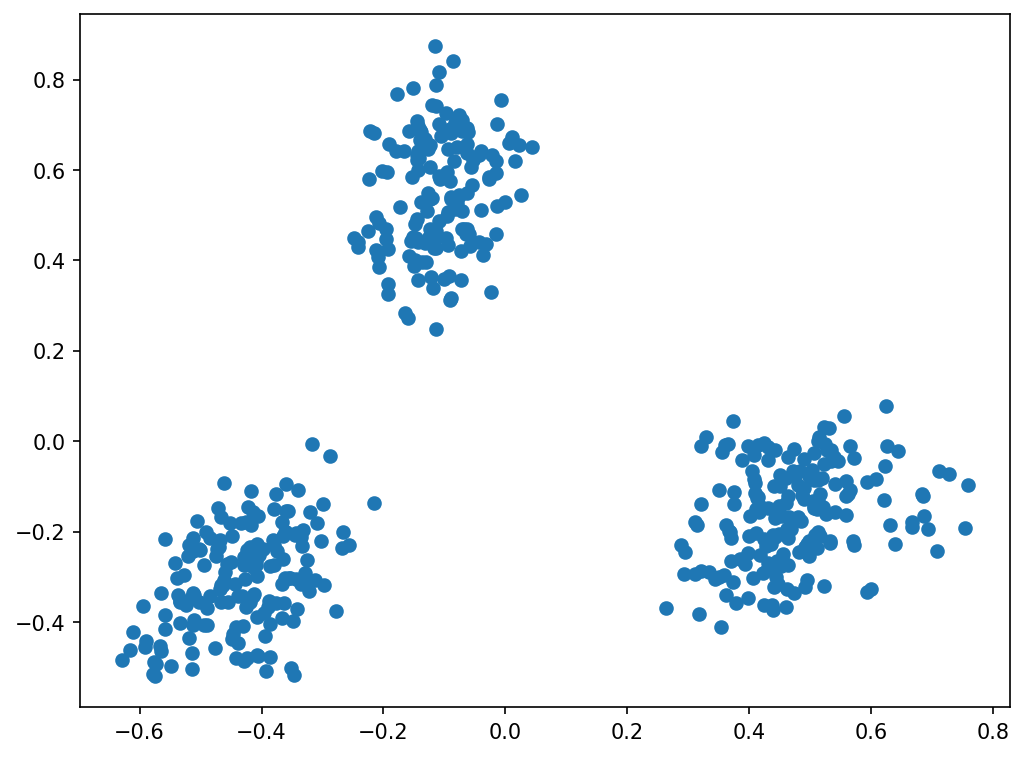

In [13]:
plt.figure(figsize=(8,6), dpi=150)
plt.scatter(X_pca['P1'], X_pca['P2'])
plt.show()

# K

In [14]:
silhouette_scores = []

best_k = None
best_silhouette_score = -1


for k in range(2, 20):
    model = KMeans(n_clusters=k, random_state=15)
    
    model.fit(X_pca)
    
    silhouette_avg = silhouette_score(X_pca, model.labels_)  
    silhouette_scores.append(silhouette_avg)

    if silhouette_avg > best_silhouette_score:
        
        best_k = k
        best_silhouette_score = silhouette_avg


print("Best K -->", best_k)
print("Best Silhouette Score:", best_silhouette_score)

Best K --> 3
Best Silhouette Score: 0.797206084756967


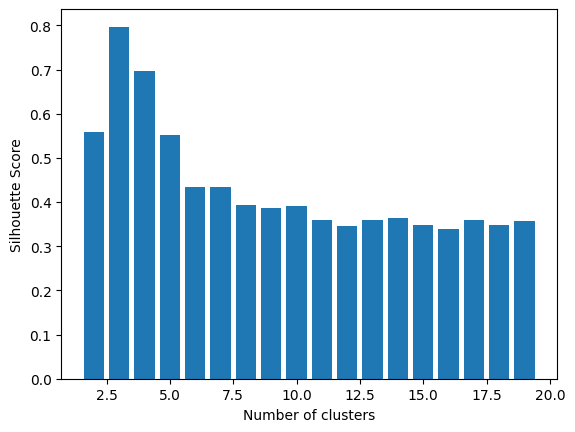

In [15]:
silhouette_scores = [] 

for n_cluster in range(2, 20):
    silhouette_scores.append( 
        silhouette_score(X_pca, KMeans(n_clusters = n_cluster).fit_predict(X_pca))) 
    


k = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

plt.bar(k, silhouette_scores) 

plt.xlabel('Number of clusters') 
plt.ylabel('Silhouette Score') 

plt.show() 

# MODEL

In [16]:
kmeans = KMeans(n_clusters=3,  
                random_state=15)


kmeans_predx = kmeans.fit_predict(X_pca)


X_pca["Cluster"] = kmeans_predx
df["Cluster"] = kmeans_predx

In [17]:
sse_km = kmeans.inertia_
print(f'SSE --> {sse_km}')

SSE --> 10.087248805287903


In [18]:
silhouette_km = silhouette_score(X_pca, kmeans_predx)
print(f'Silhouette_score --> {silhouette_km}')

Silhouette_score --> 0.8694635416987182


# CLUSTERS

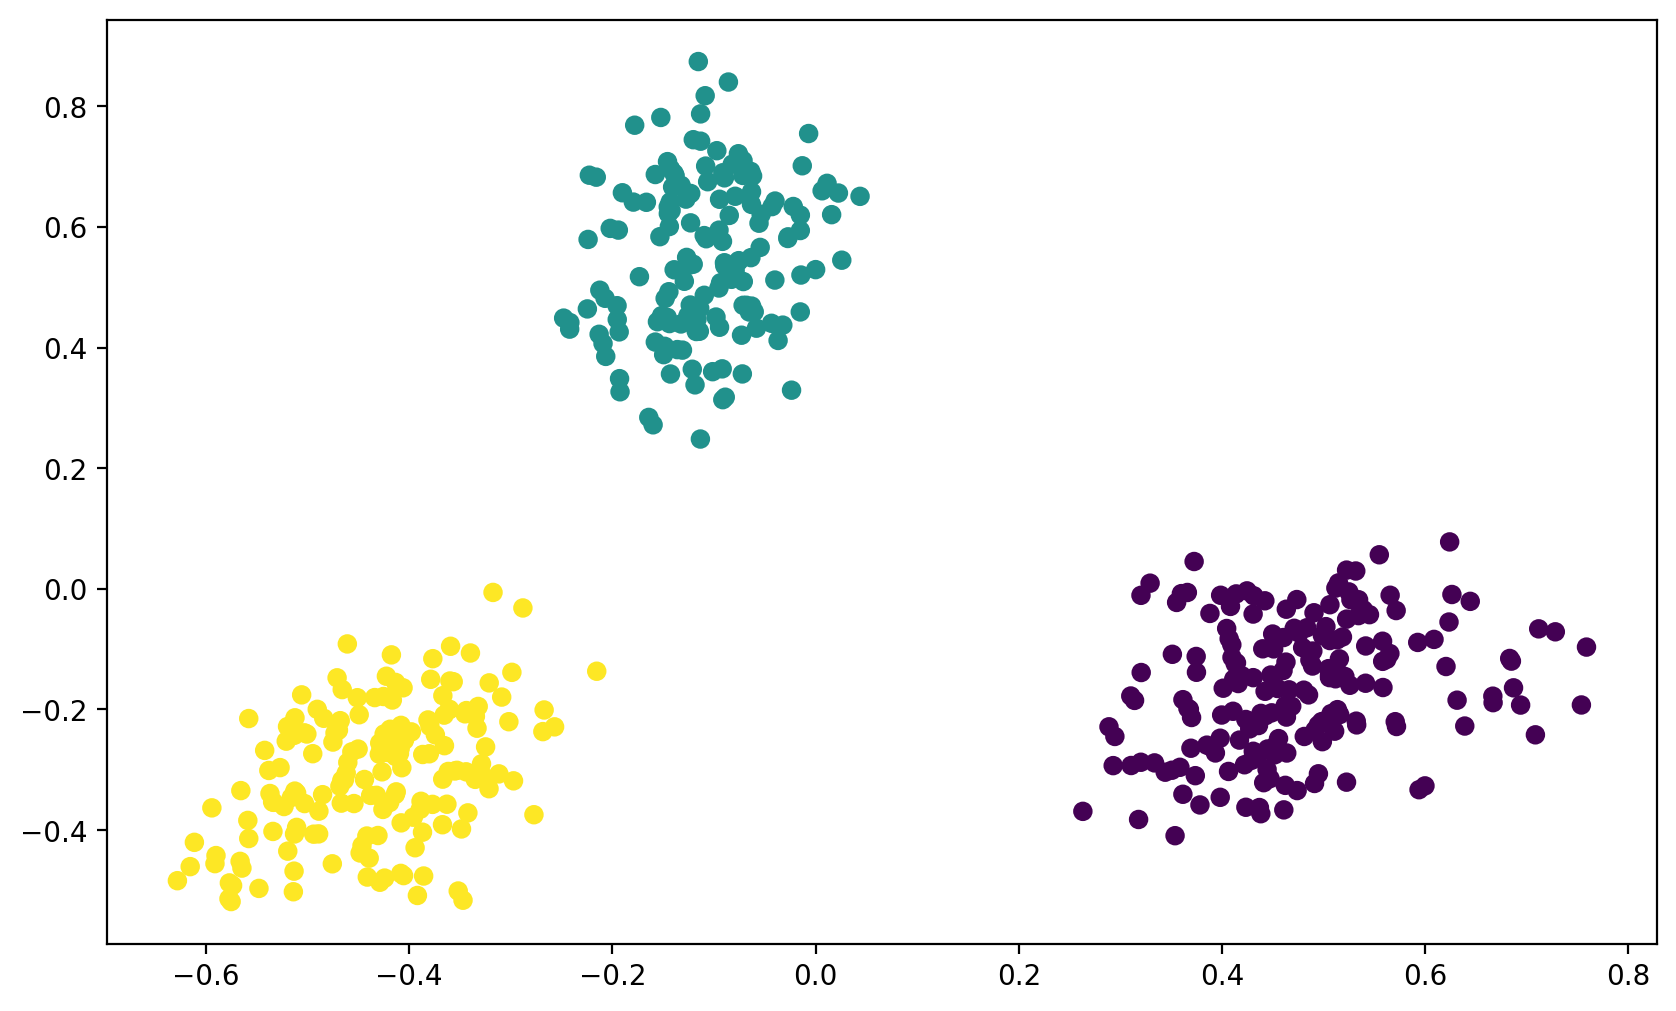

In [19]:
plt.figure(figsize=(10, 6), dpi=200)
plt.scatter(X_pca['P1'], X_pca['P2'], c = kmeans_predx) 
plt.show() 

In [20]:
clusters = df.groupby('Cluster').mean(numeric_only=True)

print('The clusters were analyzed based on the mean values of key variables -->\n')

clusters

The clusters were analyzed based on the mean values of key variables -->



,Age,University_Year,Sleep_Duration,Study_Hours,Screen_Time,Caffeine_Intake,Physical_Activity,Sleep_Quality
Cluster,,,,,,,,
0,21.430108,2.451613,6.358065,6.033871,2.585484,2.473118,62.736559,5.102151
1,21.716216,2.439189,6.549324,6.423649,2.452027,2.689189,66.283784,5.472973
2,21.493976,2.493976,6.531928,5.528916,2.522289,2.246988,58.385542,5.554217
